In [75]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [76]:
# Read in data sets
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [77]:
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [78]:
migration_df.head()

,Country name,Year,Net migration
0,Afghanistan,1950,6161.0
1,Afghanistan,1951,4903.0
2,Afghanistan,1952,145.0
3,Afghanistan,1953,-8867.0
4,Afghanistan,1954,-6837.0


In [79]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [80]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [81]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [82]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [83]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [84]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [85]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [86]:
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
74,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
76,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [87]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,1989,5411.0,2683.0,10673172.0
74,Afghanistan,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,1991,3553.0,39926.0,10745168.0
76,Afghanistan,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [88]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [89]:
# Remove all countries except for one
country_name = "Mexico"
one_country_df = merged_df[merged_df['Country name'] == country_name]
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
3696,Mexico,1989,2.0,-592054.0,80233750.0
3697,Mexico,1990,10.0,-286584.0,81720424.0
3698,Mexico,1991,1.0,-319832.0,83351600.0
3699,Mexico,1992,0.0,-298907.0,84993160.0
3700,Mexico,1993,27.0,-316437.0,86648440.0


In [90]:
# Reset Index
one_country_df.reset_index(drop=True, inplace=True)
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Mexico,1989,2.0,-592054.0,80233750.0
1,Mexico,1990,10.0,-286584.0,81720424.0
2,Mexico,1991,1.0,-319832.0,83351600.0
3,Mexico,1992,0.0,-298907.0,84993160.0
4,Mexico,1993,27.0,-316437.0,86648440.0


In [91]:
# Drop Country Name and rename df
one_country_df.drop(["Country name"], axis=1, inplace=True)
mexico_df = one_country_df
mexico_df

C:\Users\tdp15\AppData\Local\Temp\ipykernel_17840\2496429219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_country_df.drop(["Country name"], axis=1, inplace=True)


,Year,total_conflict_deaths,Net migration,Population
0,1989,2.0,-592054.0,80233750.0
1,1990,10.0,-286584.0,81720424.0
2,1991,1.0,-319832.0,83351600.0
3,1992,0.0,-298907.0,84993160.0
4,1993,27.0,-316437.0,86648440.0
5,1994,145.0,-276896.0,88314420.0
6,1995,1.0,-313979.0,89969570.0
7,1996,37.0,-320872.0,91586560.0
8,1997,45.0,-312542.0,93183090.0
9,1998,0.0,-302976.0,94767290.0


In [92]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

In [93]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

C:\Users\tdp15\AppData\Local\Temp\ipykernel_17840\3758931079.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(10, 6))


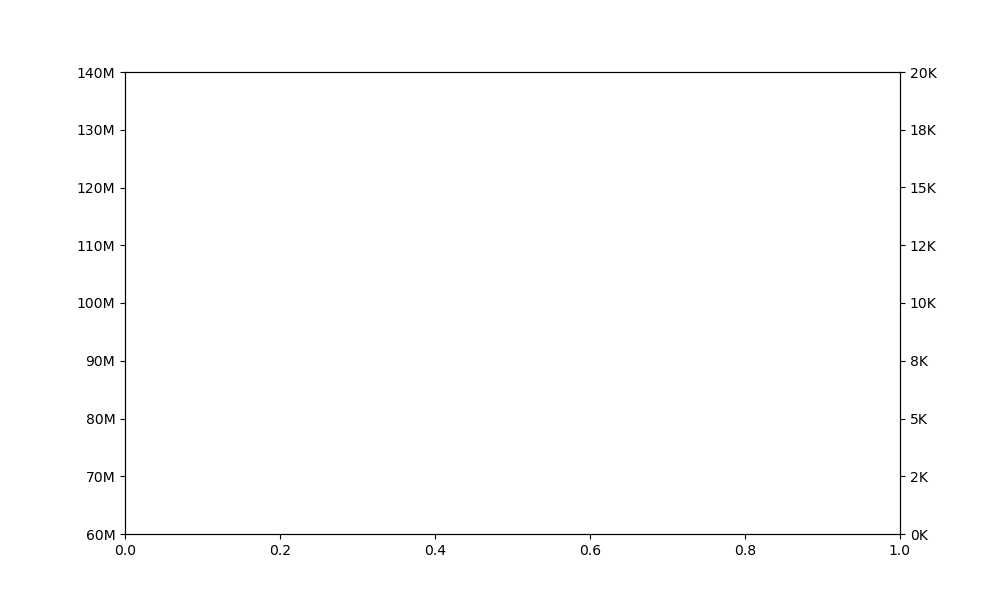

In [147]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  
#ax1.set_ylim(-2, 1)
ax2.set_ylim(0, 20000)
ax1.set_ylim(60000000, 140000000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)

In [148]:
# Plot Conflicts
ax2.plot(mexico_df.Year, mexico_df.total_conflict_deaths, label="Conflict Deaths", color="red")

In [149]:
# Plot Population
ax1.plot(mexico_df.Year, mexico_df.Population, label="Population", color="blue")

In [154]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('People')
plt.ylabel('People')
plt.title("Mexico: Conflict's Effect on Population")
ax2.grid(True)
ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

In [99]:
mexico_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1.000000,0.665965,0.825470,0.999115
total_conflict_deaths,0.665965,1.000000,0.542810,0.637364
Net migration,0.825470,0.542810,1.000000,0.820567
Population,0.999115,0.637364,0.820567,1.000000
